# How deserving are the NBA MVPs selected in this century (2001 to 2024)

The goal is to use available advanced stats and make some calculations to determine who was the deserving Most Valuable Player (MVP) each year, and which actual MVPs were selected incorrectly based on these stats. Recently, there have been an influx of advanced stats in basketball, mostly used to calculate the impact of individual players. Some of these stats are not as easy to find, so we will use only 3 stats that are easily accessible in the Basketball Reference website (https://www.basketball-reference.com/). The stats are:

Player Efficiency Rating (PER) - Standardized per-minute production
Box Plus/Minus (BPM) - Estimates a basketball player’s contribution to the team when that player is on the court.
Win Shares Per 48 Minutes (WS/48) - Estimate of the number of wins contributed by the player per 48 minutes.

## Getting the Data (Data Scraping)

#### MVP Candidates

The first thing we're going to do is to get the top 10 MVP vote getters for each year and put them in a dataframe

In [101]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

# Initialize an empty list to store player data
player_data = []

# Loop through each year
for year in range(2001, 2025):
    URL = f'https://www.basketball-reference.com/awards/awards_{year}.html'
    print(f"Scraping URL: {URL}")
    page = requests.get(URL)
    soup = BeautifulSoup(page.content, 'html.parser')
    table = soup.find('table', id="mvp")
    rows = table.find('tbody').find_all('tr')

    # Loop through the rows and extract the player details
    for row in rows[:10]:  # This will take the first 10 players in the table (Top 10 MVP vote-getters)
        rank = row.find('th', {'data-stat': 'rank'}).text.strip()
        player_cell = row.find('td', {'data-stat': 'player'})
        if player_cell:
            player_link = player_cell.find('a')
            player_name = player_link.text.strip()
            player_href = player_link['href']
        team_cell = row.find('td', {'data-stat': 'team_id'})
        if team_cell:
            team_name = team_cell.text.strip()

        # Append the extracted data to the list
        player_data.append({
            'Year': year,
            'Rank': rank,
            'Name': player_name,
            'Team': team_name,
            'Link': f"https://www.basketball-reference.com{player_href}"
        })

# Create a DataFrame from the collected data
df_mvp_list = pd.DataFrame(player_data)

Scraping URL: https://www.basketball-reference.com/awards/awards_2001.html
Scraping URL: https://www.basketball-reference.com/awards/awards_2002.html
Scraping URL: https://www.basketball-reference.com/awards/awards_2003.html
Scraping URL: https://www.basketball-reference.com/awards/awards_2004.html
Scraping URL: https://www.basketball-reference.com/awards/awards_2005.html
Scraping URL: https://www.basketball-reference.com/awards/awards_2006.html
Scraping URL: https://www.basketball-reference.com/awards/awards_2007.html
Scraping URL: https://www.basketball-reference.com/awards/awards_2008.html
Scraping URL: https://www.basketball-reference.com/awards/awards_2009.html
Scraping URL: https://www.basketball-reference.com/awards/awards_2010.html
Scraping URL: https://www.basketball-reference.com/awards/awards_2011.html
Scraping URL: https://www.basketball-reference.com/awards/awards_2012.html
Scraping URL: https://www.basketball-reference.com/awards/awards_2013.html
Scraping URL: https://www

Print and examine the dataframe to see if it looks good

In [130]:
df_mvp_list

,Year,Rank,Name,Team,Link
0,2001,1,Allen Iverson,PHI,https://www.basketball-reference.com/players/i...
1,2001,2,Tim Duncan,SAS,https://www.basketball-reference.com/players/d...
2,2001,3,Shaquille O'Neal,LAL,https://www.basketball-reference.com/players/o...
3,2001,4,Chris Webber,SAC,https://www.basketball-reference.com/players/w...
4,2001,5,Kevin Garnett,MIN,https://www.basketball-reference.com/players/g...
...,...,...,...,...,...
234,2024,5,Jalen Brunson,NYK,https://www.basketball-reference.com/players/b...
235,2024,6,Jayson Tatum,BOS,https://www.basketball-reference.com/players/t...
236,2024,7,Anthony Edwards,MIN,https://www.basketball-reference.com/players/e...
237,2024,8,Domantas Sabonis,SAC,https://www.basketball-reference.com/players/s...


#### Advanced Stats

Now that we have all the players that we are interested in, we will use the last column (Link) of the previous dataframe to navigate to those pages and collect the advanced stats for each one of them.

Advanced Stats - PER, BPM, and WS/48

In [109]:
import time

# Initialize a list to store the extracted stats
advanced_stats = []

# Loop through each player in the DataFrame
for index, row in df_mvp_list.iterrows():
    year = row['Year']
    name = row['Name']
    player_link = row['Link']
    
    print(f"Navigating to URL: {player_link}")
    print(str(year)+' - '+name)
    # Make a request to the player's page
    response = requests.get(player_link)
    soup = BeautifulSoup(response.content, 'html.parser')

    # Add some time so the page does not classify our requests as a bot
    time.sleep(5)
    
    # Locate the advanced stats table
    table = soup.find('table', {'id': 'advanced'})
    if table:
        # Find the row corresponding to the specific year
        rows = table.find('tbody').find_all('tr')
        for row in rows:
            season = row.find('th', {'data-stat': 'season'}).text.strip()
            # Check if the season ends with the specified year
            if season.startswith(str(int(year)-1)):
                per = row.find('td', {'data-stat': 'per'}).text.strip()
                bpm = row.find('td', {'data-stat': 'bpm'}).text.strip()
                ws_per_48 = row.find('td', {'data-stat': 'ws_per_48'}).text.strip()
                
                # Append the extracted data to the list
                advanced_stats.append({
                    'Year': year,
                    'Name': name,
                    'PER': per,
                    'BPM': bpm,
                    'WS/48': ws_per_48
                })
    else:
        print(f"No advanced stats table found for {name} in year {year}")

# Create a DataFrame from the collected advanced stats
df_advanced_stats = pd.DataFrame(advanced_stats)

Navigating to URL: https://www.basketball-reference.com/players/i/iversal01.html
2001 - Allen Iverson
Navigating to URL: https://www.basketball-reference.com/players/d/duncati01.html
2001 - Tim Duncan
Navigating to URL: https://www.basketball-reference.com/players/o/onealsh01.html
2001 - Shaquille O'Neal
Navigating to URL: https://www.basketball-reference.com/players/w/webbech01.html
2001 - Chris Webber
Navigating to URL: https://www.basketball-reference.com/players/g/garneke01.html
2001 - Kevin Garnett
Navigating to URL: https://www.basketball-reference.com/players/m/mcgratr01.html
2001 - Tracy McGrady
Navigating to URL: https://www.basketball-reference.com/players/m/malonka01.html
2001 - Karl Malone
Navigating to URL: https://www.basketball-reference.com/players/k/kiddja01.html
2001 - Jason Kidd
Navigating to URL: https://www.basketball-reference.com/players/b/bryanko01.html
2001 - Kobe Bryant
Navigating to URL: https://www.basketball-reference.com/players/r/robinda01.html
2001 - Dav

Print and examine the dataframe to see if it looks good

In [131]:
df_advanced_stats

,Year,Name,PER,BPM,WS/48
0,2001,Allen Iverson,24.0,6.1,0.190
1,2001,Tim Duncan,23.8,4.7,0.200
2,2001,Shaquille O'Neal,30.2,7.7,0.245
3,2001,Chris Webber,24.7,5.5,0.186
4,2001,Kevin Garnett,23.9,6.0,0.176
...,...,...,...,...,...
238,2024,Jalen Brunson,23.4,5.8,0.198
239,2024,Jayson Tatum,22.3,5.1,0.189
240,2024,Anthony Edwards,19.7,3.3,0.130
241,2024,Domantas Sabonis,23.2,6.5,0.206


We can see that the dataframe have 243 rows instead of 239 like the first one. It is probably because of some duplicates, but we will deal with this soon.

#### Advanced Stats Profile

To compare the stats we first need to normalize them so they use a common scale

We will use this formula:

**X = (x-xmin)/(xmax-xmin)**

To make the calculations we need to go to each year and find the minimum and maximum values of our advanced stats (PER, BPM, and WS/48)

##### Complications

1. The advanced stats table contains non-qualified players and this data would affect our results

>- To eliminate the non-qualified players, we have to sort the table and we are unable to use BeautifulSoup to do this part
>- To collect this data we have to use selenium so the code can complete these actions>

2. While trying to navigate through the pages, some ads will block the clicking or block the scrolling of the page

>   - To eliminate the non-qualified players, we have to sort the table and we are unable to use BeautifulSoup to do this part
>   - Using selenium we have to find a way to check for ads and close them if they are affecting the actions needed to get the data

In [113]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.service import Service
from selenium.common.exceptions import NoSuchElementException, TimeoutException, ElementClickInterceptedException

# Define the path to your ChromeDriver executable
chrome_driver_path = r'C:\drivers\chromedriver-win64\chromedriver.exe'

# Create a Service object with the path to the ChromeDriver executable
service = Service(executable_path=chrome_driver_path)

# Initialize the WebDriver with the Service object
driver = webdriver.Chrome(service=service)

# Maximize the browser window
driver.maximize_window()

# List to store the data for the DataFrame
data = []

# Function to click header with ad handling and scrolling
def try_clicking_header(driver):
    try:
        # Define the header element for sorting by PER
        header = (By.XPATH, '//th[@data-stat="per"]')
        # Wait for the element to be clickable and then click it
        WebDriverWait(driver, 10).until(EC.element_to_be_clickable(header)).click()
    except (ElementClickInterceptedException, TimeoutException):
        try:
            # Attempt to close the ad if the header click is unsuccessful
            ad_close_button = WebDriverWait(driver, 10).until(
                EC.element_to_be_clickable((By.ID, 'modal-close'))
            )
            ad_close_button.click()
            # Retry clicking the header after closing the ad
            WebDriverWait(driver, 10).until(EC.element_to_be_clickable(header)).click()
        except (TimeoutException, NoSuchElementException, ElementClickInterceptedException):
            try:
                # Scroll down about 2 inches if the ad close button is not found or not clickable
                driver.execute_script("window.scrollBy(0, 200);")
                # Retry clicking the header after scrolling
                WebDriverWait(driver, 10).until(EC.element_to_be_clickable(header)).click()
            except (TimeoutException, NoSuchElementException, ElementClickInterceptedException):
                print("Header still not clickable after scrolling.")

# Loop through the years 2001 to 2025
for year in range(2001, 2025):
    url = f'https://www.basketball-reference.com/leagues/NBA_{year}_advanced.html'
    driver.get(url)

    # Scroll to the specific vertical position (advanced stats table)
    vertical_position = 800 
    driver.execute_script(f"window.scrollTo(0, {vertical_position});")

    # Try clicking the header with ad handling and scrolling
    try_clicking_header(driver)

    # Wait for the table to be sorted and updated
    WebDriverWait(driver, 10).until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, 'table#advanced_stats tbody tr')))

    # Wait 3 seconds to make sure the table is sorted
    time.sleep(3)

    # Extract visible PER, BPM, and WS/48 values after sorting
    rows = driver.find_elements(By.CSS_SELECTOR, 'table#advanced_stats tbody tr:not(.non_qual)')
    per_values = []
    bpm_values = []
    ws48_values = []

    for row in rows:
        try:
            per_cell = row.find_element(By.CSS_SELECTOR, 'td[data-stat="per"]')
            bpm_cell = row.find_element(By.CSS_SELECTOR, 'td[data-stat="bpm"]')
            ws48_cell = row.find_element(By.CSS_SELECTOR, 'td[data-stat="ws_per_48"]')
            if per_cell and per_cell.is_displayed():
                per = per_cell.text.strip()
                if per:
                    per_values.append(float(per))
            if bpm_cell and bpm_cell.is_displayed():
                bpm = bpm_cell.text.strip()
                if bpm:
                    bpm_values.append(float(bpm))
            if ws48_cell and ws48_cell.is_displayed():
                ws48 = ws48_cell.text.strip()
                if ws48:
                    ws48_values.append(float(ws48))
        except NoSuchElementException:
            # Skip rows that don't have the necessary cells
            continue

    # Get the minimum and maximum values for each stat
    min_per = min(per_values) if per_values else None
    max_per = max(per_values) if per_values else None
    min_bpm = min(bpm_values) if bpm_values else None
    max_bpm = max(bpm_values) if bpm_values else None
    min_ws48 = min(ws48_values) if ws48_values else None
    max_ws48 = max(ws48_values) if ws48_values else None

    # Store the result in the list
    data.append({'Year': year, 'Stat': 'PER', 'Min': min_per, 'Max': max_per})
    data.append({'Year': year, 'Stat': 'BPM', 'Min': min_bpm, 'Max': max_bpm})
    data.append({'Year': year, 'Stat': 'WS/48', 'Min': min_ws48, 'Max': max_ws48})
    print(f"Getting data for year: {year}")
    
# Close the browser
driver.quit()

# Create the DataFrame
df_stats_profile = pd.DataFrame(data)

Getting data for year: 2001
Getting data for year: 2002
Getting data for year: 2003
Getting data for year: 2004
Getting data for year: 2005
Getting data for year: 2006
Getting data for year: 2007
Getting data for year: 2008
Getting data for year: 2009
Getting data for year: 2010
Getting data for year: 2011
Getting data for year: 2012
Getting data for year: 2013
Getting data for year: 2014
Getting data for year: 2015
Getting data for year: 2016
Getting data for year: 2017
Getting data for year: 2018
Getting data for year: 2019
Getting data for year: 2020
Getting data for year: 2021
Getting data for year: 2022
Getting data for year: 2023
Getting data for year: 2024


Print and examine the dataframe to see if it looks good

In [132]:
df_stats_profile

,Year,Stat,Min,Max
0,2001,PER,8.100,30.200
1,2001,BPM,-6.100,7.700
2,2001,WS/48,-0.022,0.246
3,2002,PER,6.200,29.700
4,2002,BPM,-6.900,8.000
...,...,...,...,...
67,2023,BPM,-5.200,13.000
68,2023,WS/48,-0.012,0.308
69,2024,PER,7.700,31.000
70,2024,BPM,-5.800,13.200


## Transforming and preparing the data

We have already downloaded the necessary data and we have saved it into 3 dataframes. Now we need to manipulate the data and make some calculations to create our final dataframe to analyze.

#### Merge dataframes and normalize stats

We need to merge the newly collected data, stats' maximum and minimum, with the player's advanced stats. With the data in the same dataframe, we can easily norrmalize the stats using the following formula:

**X = (x-xmin)/(xmax-xmin)**

In [134]:
# Ensure 'Year' columns are of the same type for merging
df_advanced_stats['Year'] = df_advanced_stats['Year'].astype(int)
df_stats_profile['Year'] = df_stats_profile['Year'].astype(int)

# Convert 'Min' and 'Max' columns to numeric in df_stats_profile
df_stats_profile['Min'] = pd.to_numeric(df_stats_profile['Min'], errors='coerce')
df_stats_profile['Max'] = pd.to_numeric(df_stats_profile['Max'], errors='coerce')

# Filter df_stats_profile for each stat
df_per = df_stats_profile[df_stats_profile['Stat'] == 'PER']
df_bpm = df_stats_profile[df_stats_profile['Stat'] == 'BPM']
df_ws48 = df_stats_profile[df_stats_profile['Stat'] == 'WS/48']

# Convert relevant columns in df_advanced_stats to numeric
df_advanced_stats['PER'] = pd.to_numeric(df_advanced_stats['PER'], errors='coerce')
df_advanced_stats['BPM'] = pd.to_numeric(df_advanced_stats['BPM'], errors='coerce')
df_advanced_stats['WS/48'] = pd.to_numeric(df_advanced_stats['WS/48'], errors='coerce')

# Merge df_advanced_stats with df_per, df_bpm, and df_ws48 on 'Year'
df_merged_stats = df_advanced_stats.merge(df_per[['Year', 'Min', 'Max']], on='Year', how='left', suffixes=('', '_PER'))
df_merged_stats = df_merged_stats.rename(columns={'Min': 'Min_PER', 'Max': 'Max_PER'})

df_merged_stats = df_merged_stats.merge(df_bpm[['Year', 'Min', 'Max']], on='Year', how='left', suffixes=('', '_BPM'))
df_merged_stats = df_merged_stats.rename(columns={'Min': 'Min_BPM', 'Max': 'Max_BPM'})

df_merged_stats = df_merged_stats.merge(df_ws48[['Year', 'Min', 'Max']], on='Year', how='left', suffixes=('', '_WS/48'))
df_merged_stats = df_merged_stats.rename(columns={'Min': 'Min_WS/48', 'Max': 'Max_WS/48'})

# Calculate normalized values
df_merged_stats['PER Norm'] = (df_merged_stats['PER'] - df_merged_stats['Min_PER']) / (df_merged_stats['Max_PER'] - df_merged_stats['Min_PER'])
df_merged_stats['BPM Norm'] = (df_merged_stats['BPM'] - df_merged_stats['Min_BPM']) / (df_merged_stats['Max_BPM'] - df_merged_stats['Min_BPM'])
df_merged_stats['WS/48 Norm'] = (df_merged_stats['WS/48'] - df_merged_stats['Min_WS/48']) / (df_merged_stats['Max_WS/48'] - df_merged_stats['Min_WS/48'])


Print and examine the dataframe to see if it looks good

In [135]:
df_merged_stats

,Year,Name,PER,BPM,WS/48,Min_PER,Max_PER,Min_BPM,Max_BPM,Min_WS/48,Max_WS/48,PER Norm,BPM Norm,WS/48 Norm
0,2001,Allen Iverson,24.0,6.1,0.190,8.1,30.2,-6.1,7.7,-0.022,0.246,0.719457,0.884058,0.791045
1,2001,Tim Duncan,23.8,4.7,0.200,8.1,30.2,-6.1,7.7,-0.022,0.246,0.710407,0.782609,0.828358
2,2001,Shaquille O'Neal,30.2,7.7,0.245,8.1,30.2,-6.1,7.7,-0.022,0.246,1.000000,1.000000,0.996269
3,2001,Chris Webber,24.7,5.5,0.186,8.1,30.2,-6.1,7.7,-0.022,0.246,0.751131,0.840580,0.776119
4,2001,Kevin Garnett,23.9,6.0,0.176,8.1,30.2,-6.1,7.7,-0.022,0.246,0.714932,0.876812,0.738806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,2024,Jalen Brunson,23.4,5.8,0.198,7.7,31.0,-5.8,13.2,-0.045,0.299,0.673820,0.610526,0.706395
239,2024,Jayson Tatum,22.3,5.1,0.189,7.7,31.0,-5.8,13.2,-0.045,0.299,0.626609,0.573684,0.680233
240,2024,Anthony Edwards,19.7,3.3,0.130,7.7,31.0,-5.8,13.2,-0.045,0.299,0.515021,0.478947,0.508721
241,2024,Domantas Sabonis,23.2,6.5,0.206,7.7,31.0,-5.8,13.2,-0.045,0.299,0.665236,0.647368,0.729651


#### Create a new aggregate stat based on the normalized values of PER, BPM, and WS/48

We could have give the same weight to all 3 stats, but after reserching, not all stats have the same trust factor among NBA executives.

https://hoopshype.com/lists/advanced-stats-nba-real-plus-minus-rapm-win-shares-analytics/

According to the above link, 29 executives were asked about some advanced stats. The results for the 3 stats that we are using in this study are the following:

PER - 22 out of 29 (76%) executives said they don't trust the stat<br>
WS/48 - 14 out of 29 (48%) executives said they don't trust the stat<br>
BPM - 3 out of (10%) executives said they don't trust the stat

Based on these results we decided to give different weights to each stat:

PER = 1x<br>
WS/48 = 2x<br>
BPM = 3x

We will add a new column 'Aggregate Stat' to dataframe df_merged_stats using the formula:

Aggregate Stat = PER + 2 * WS/48 + 3 * BPM

In [136]:
df_merged_stats['Aggregate Stat'] = df_merged['PER Norm'] + 2*df_merged['WS/48 Norm'] + 3*df_merged['BPM Norm']
df_merged_stats

,Year,Name,PER,BPM,WS/48,Min_PER,Max_PER,Min_BPM,Max_BPM,Min_WS/48,Max_WS/48,PER Norm,BPM Norm,WS/48 Norm,Aggregate Stat
0,2001,Allen Iverson,24.0,6.1,0.190,8.1,30.2,-6.1,7.7,-0.022,0.246,0.719457,0.884058,0.791045,4.953720
1,2001,Tim Duncan,23.8,4.7,0.200,8.1,30.2,-6.1,7.7,-0.022,0.246,0.710407,0.782609,0.828358,4.714950
2,2001,Shaquille O'Neal,30.2,7.7,0.245,8.1,30.2,-6.1,7.7,-0.022,0.246,1.000000,1.000000,0.996269,5.992537
3,2001,Chris Webber,24.7,5.5,0.186,8.1,30.2,-6.1,7.7,-0.022,0.246,0.751131,0.840580,0.776119,4.825109
4,2001,Kevin Garnett,23.9,6.0,0.176,8.1,30.2,-6.1,7.7,-0.022,0.246,0.714932,0.876812,0.738806,4.822979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,2024,Jalen Brunson,23.4,5.8,0.198,7.7,31.0,-5.8,13.2,-0.045,0.299,0.673820,0.610526,0.706395,3.918189
239,2024,Jayson Tatum,22.3,5.1,0.189,7.7,31.0,-5.8,13.2,-0.045,0.299,0.626609,0.573684,0.680233,3.708127
240,2024,Anthony Edwards,19.7,3.3,0.130,7.7,31.0,-5.8,13.2,-0.045,0.299,0.515021,0.478947,0.508721,2.969305
241,2024,Domantas Sabonis,23.2,6.5,0.206,7.7,31.0,-5.8,13.2,-0.045,0.299,0.665236,0.647368,0.729651,4.066644


We still have the problem of duplicates. The reason is that some players changed teams during the season and we get the stats they have for both teams plus the totals for the year. Let's remove the duplicates keeping only the first row with the year/name (season totals)

In [137]:
df_merged_stats = df_merged_stats.drop_duplicates(subset=['Year', 'Name'], keep='first')
df_merged_stats

,Year,Name,PER,BPM,WS/48,Min_PER,Max_PER,Min_BPM,Max_BPM,Min_WS/48,Max_WS/48,PER Norm,BPM Norm,WS/48 Norm,Aggregate Stat
0,2001,Allen Iverson,24.0,6.1,0.190,8.1,30.2,-6.1,7.7,-0.022,0.246,0.719457,0.884058,0.791045,4.953720
1,2001,Tim Duncan,23.8,4.7,0.200,8.1,30.2,-6.1,7.7,-0.022,0.246,0.710407,0.782609,0.828358,4.714950
2,2001,Shaquille O'Neal,30.2,7.7,0.245,8.1,30.2,-6.1,7.7,-0.022,0.246,1.000000,1.000000,0.996269,5.992537
3,2001,Chris Webber,24.7,5.5,0.186,8.1,30.2,-6.1,7.7,-0.022,0.246,0.751131,0.840580,0.776119,4.825109
4,2001,Kevin Garnett,23.9,6.0,0.176,8.1,30.2,-6.1,7.7,-0.022,0.246,0.714932,0.876812,0.738806,4.822979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,2024,Jalen Brunson,23.4,5.8,0.198,7.7,31.0,-5.8,13.2,-0.045,0.299,0.673820,0.610526,0.706395,3.918189
239,2024,Jayson Tatum,22.3,5.1,0.189,7.7,31.0,-5.8,13.2,-0.045,0.299,0.626609,0.573684,0.680233,3.708127
240,2024,Anthony Edwards,19.7,3.3,0.130,7.7,31.0,-5.8,13.2,-0.045,0.299,0.515021,0.478947,0.508721,2.969305
241,2024,Domantas Sabonis,23.2,6.5,0.206,7.7,31.0,-5.8,13.2,-0.045,0.299,0.665236,0.647368,0.729651,4.066644


Now we will add a new column called 'New Rank', to rank the players each year based on the new Aggregate Stat

In [139]:
# Create the New Rank column based on the Aggregate Stat for each year
df_merged_stats['New Rank'] = df_merged_stats.groupby('Year')['Aggregate Stat'].rank(ascending=False, method='min')

# Convert the rank to integer using .loc
df_merged_stats.loc[:, 'New Rank'] = df_merged_stats['New Rank'].astype(int)

# Sort by Year and New Rank to verify the results
df_merged_stats = df_merged_stats.sort_values(by=['Year', 'New Rank'])

# Print the sorted DataFrame
df_merged_stats


,Year,Name,PER,BPM,WS/48,Min_PER,Max_PER,Min_BPM,Max_BPM,Min_WS/48,Max_WS/48,PER Norm,BPM Norm,WS/48 Norm,Aggregate Stat,New Rank
2,2001,Shaquille O'Neal,30.2,7.7,0.245,8.1,30.2,-6.1,7.7,-0.022,0.246,1.000000,1.000000,0.996269,5.992537,1.0
6,2001,Karl Malone,24.7,6.6,0.217,8.1,30.2,-6.1,7.7,-0.022,0.246,0.751131,0.920290,0.891791,5.295583,2.0
5,2001,Tracy McGrady,24.9,7.0,0.189,8.1,30.2,-6.1,7.7,-0.022,0.246,0.760181,0.949275,0.787313,5.182634,3.0
9,2001,David Robinson,23.7,5.2,0.246,8.1,30.2,-6.1,7.7,-0.022,0.246,0.705882,0.818841,1.000000,5.162404,4.0
0,2001,Allen Iverson,24.0,6.1,0.190,8.1,30.2,-6.1,7.7,-0.022,0.246,0.719457,0.884058,0.791045,4.953720,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,2024,Domantas Sabonis,23.2,6.5,0.206,7.7,31.0,-5.8,13.2,-0.045,0.299,0.665236,0.647368,0.729651,4.066644,5.0
238,2024,Jalen Brunson,23.4,5.8,0.198,7.7,31.0,-5.8,13.2,-0.045,0.299,0.673820,0.610526,0.706395,3.918189,6.0
239,2024,Jayson Tatum,22.3,5.1,0.189,7.7,31.0,-5.8,13.2,-0.045,0.299,0.626609,0.573684,0.680233,3.708127,7.0
242,2024,Kevin Durant,21.2,4.0,0.142,7.7,31.0,-5.8,13.2,-0.045,0.299,0.579399,0.515789,0.543605,3.213977,8.0


#### Create final dataframe to analyze data and reach conclusions

We already have the New Rank based on the advanced stats, now we need to include the Original Rank in the dataframe by merging the latest dataframe with the first one we created (df_mvp_list)

We will also create a column called 'Stat Differential' to calculate the difference between each player's Aggregate Stat and the leader for each year

In [140]:
# Merge the two DataFrames
df_final_merge = pd.merge(df_merged_stats, df_mvp_list, on=['Year', 'Name'])

# Calculate the highest Aggregate Stat per year
max_aggregate_stats = df_final_merge.groupby('Year')['Aggregate Stat'].max().reset_index()
max_aggregate_stats.columns = ['Year', 'Max Aggregate Stat']

# Merge to get Max Aggregate Stat for each player
df_final_merge = pd.merge(df_final_merge, max_aggregate_stats, on='Year')

# Calculate Stat Differential
df_final_merge['Stat Differential'] = df_final_merge['Max Aggregate Stat'] - df_final_merge['Aggregate Stat']

# Rename columns to match the desired output
df_final_merge.rename(columns={'Rank': 'Original Rank'}, inplace=True)

# Select and reorder the columns
df_final_ranks = df_final_merge[['Year', 'Original Rank', 'Name', 'Team', 'Aggregate Stat', 'New Rank', 'Stat Differential']]


Print and examine the dataframe to see if it looks good

In [141]:
df_final_ranks

,Year,Original Rank,Name,Team,Aggregate Stat,New Rank,Stat Differential
0,2001,3,Shaquille O'Neal,LAL,5.992537,1.0,0.000000
1,2001,7,Karl Malone,UTA,5.295583,2.0,0.696954
2,2001,6,Tracy McGrady,ORL,5.182634,3.0,0.809903
3,2001,10,David Robinson,SAS,5.162404,4.0,0.830133
4,2001,1,Allen Iverson,PHI,4.953720,5.0,1.038817
...,...,...,...,...,...,...,...
234,2024,8,Domantas Sabonis,SAC,4.066644,5.0,1.933356
235,2024,5,Jalen Brunson,NYK,3.918189,6.0,2.081811
236,2024,6,Jayson Tatum,BOS,3.708127,7.0,2.291873
237,2024,9,Kevin Durant,PHO,3.213977,8.0,2.786023


We noticed that in the Original Rank some entries included a T next to the number, meaning that they were tied. Let's remove those.

In [142]:
# Remove 'T' from 'Original Rank' column
df_final_ranks.loc[:, 'Original Rank'] = df_final_ranks['Original Rank'].str.replace('T', '')

# Convert 'Original Rank' and 'New Rank' from string to integer
df_final_ranks.loc[:,'Original Rank'] = df_final_ranks['Original Rank'].astype(int)
df_final_ranks.loc[:,'New Rank'] = df_final_ranks['New Rank'].astype(int)


## Analysis and Visualizations

Let's see who are the least deserving MVPs based on the advanced stats

In [144]:
df_mvp_winners = df_final_ranks[df_final_ranks['Original Rank'] == 1]
least_deserving_mvps = df_mvp_winners.sort_values(by='Stat Differential', ascending=False).head(10)
least_deserving_mvps[['Year', 'Name', 'Team', 'Aggregate Stat', 'New Rank', 'Stat Differential']]

,Year,Name,Team,Aggregate Stat,New Rank,Stat Differential
75,2008,Kobe Bryant,LAL,4.232329,6.0,1.631472
56,2006,Steve Nash,PHO,4.459039,7.0,1.326675
46,2005,Steve Nash,PHO,4.281849,7.0,1.222465
4,2001,Allen Iverson,PHI,4.953720,5.0,1.038817
221,2023,Joel Embiid,PHI,5.063500,2.0,0.936500
102,2011,Derrick Rose,CHI,5.176552,3.0,0.823448
21,2003,Tim Duncan,SAS,5.208858,2.0,0.791142
11,2002,Tim Duncan,SAS,5.770556,2.0,0.229444
150,2016,Stephen Curry,GSW,6.000000,1.0,0.000000
210,2022,Nikola Jokić,DEN,6.000000,1.0,0.000000


We list the top 10, but we can see that the last 2 are the actual winners, so only 8 were "undeserving" according to the study. We can removed those entries where the Stat Differential is equal to 0.

In [150]:
df_filtered_mvps = df_mvp_winners[df_mvp_winners['Stat Differential'] != 0].sort_values(by='Stat Differential', ascending=False).head(10)
df_filtered_mvps

,Year,Original Rank,Name,Team,Aggregate Stat,New Rank,Stat Differential
75,2008,1,Kobe Bryant,LAL,4.232329,6.0,1.631472
56,2006,1,Steve Nash,PHO,4.459039,7.0,1.326675
46,2005,1,Steve Nash,PHO,4.281849,7.0,1.222465
4,2001,1,Allen Iverson,PHI,4.953720,5.0,1.038817
221,2023,1,Joel Embiid,PHI,5.063500,2.0,0.936500
102,2011,1,Derrick Rose,CHI,5.176552,3.0,0.823448
21,2003,1,Tim Duncan,SAS,5.208858,2.0,0.791142
11,2002,1,Tim Duncan,SAS,5.770556,2.0,0.229444


Let's add the deserving winner to this dataframe

In [151]:
# Rename the 'Name' column to 'Winner'
df_least_deserving_mvps = df_filtered_mvps.rename(columns={'Name': 'Winner'})

# Function to find the most deserving winner for a given year
def find_deserving_winner(year):
    year_data = df_final_ranks[df_final_ranks['Year'] == year]
    deserving_winner = year_data.sort_values(by='New Rank').iloc[0]
    return deserving_winner['Name'], deserving_winner['Team'], deserving_winner['Aggregate Stat']

# Add 'Deserving Winner', 'Deserving Team', and 'Deserving Aggregate Stat' columns
df_least_deserving_mvps['Deserving Winner'] = df_least_deserving_mvps['Year'].apply(lambda year: find_deserving_winner(year)[0])
df_least_deserving_mvps['Deserving Team'] = df_least_deserving_mvps['Year'].apply(lambda year: find_deserving_winner(year)[1])
df_least_deserving_mvps['Deserving Winner Aggregate Stat'] = df_least_deserving_mvps['Year'].apply(lambda year: find_deserving_winner(year)[2])

# Select and reorder the columns to display
df_least_deserving_mvps = df_least_deserving_mvps[['Year', 'Winner', 'Team', 'Aggregate Stat', 'New Rank', 'Stat Differential', 'Deserving Winner', 'Deserving Team', 'Deserving Winner Aggregate Stat']]


In [152]:
df_least_deserving_mvps

,Year,Winner,Team,Aggregate Stat,New Rank,Stat Differential,Deserving Winner,Deserving Team,Deserving Winner Aggregate Stat
75,2008,Kobe Bryant,LAL,4.232329,6.0,1.631472,Chris Paul,NOH,5.863801
56,2006,Steve Nash,PHO,4.459039,7.0,1.326675,Dirk Nowitzki,DAL,5.785714
46,2005,Steve Nash,PHO,4.281849,7.0,1.222465,Tim Duncan,SAS,5.504313
4,2001,Allen Iverson,PHI,4.953720,5.0,1.038817,Shaquille O'Neal,LAL,5.992537
221,2023,Joel Embiid,PHI,5.063500,2.0,0.936500,Nikola Jokić,DEN,6.000000
102,2011,Derrick Rose,CHI,5.176552,3.0,0.823448,LeBron James,MIA,6.000000
21,2003,Tim Duncan,SAS,5.208858,2.0,0.791142,Tracy McGrady,ORL,6.000000
11,2002,Tim Duncan,SAS,5.770556,2.0,0.229444,Shaquille O'Neal,LAL,6.000000


#### Visualizations

Let's create a couple of visualizations to help on the analysis

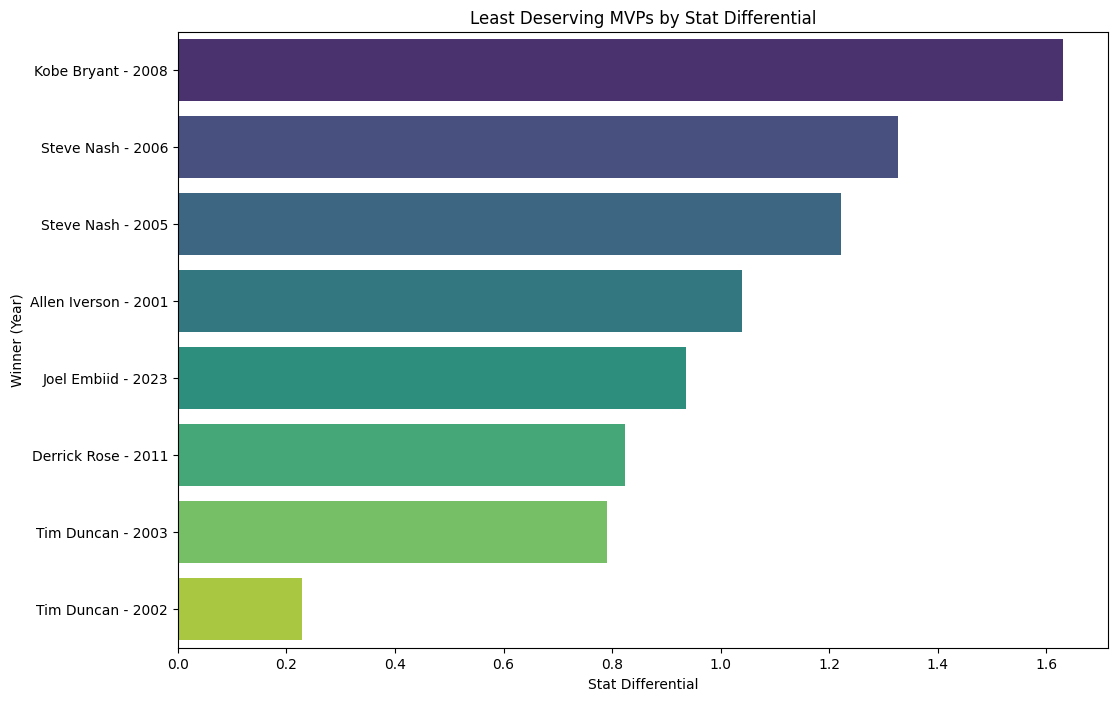

In [157]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new column for the combined name and year
df_least_deserving_mvps['Winner (Year)'] = df_least_deserving_mvps.apply(lambda row: f"{row['Winner']} - {row['Year']}", axis=1)

# Set the figure size
plt.figure(figsize=(12, 8))

# Create a barplot
sns.barplot(x='Stat Differential', y='Winner (Year)', hue='Winner (Year)', data=filtered_mvps, palette='viridis', dodge=False, legend=False)

# Add labels and title
plt.xlabel('Stat Differential')
plt.ylabel('Winner (Year)')
plt.title('Least Deserving MVPs by Stat Differential')
plt.show()


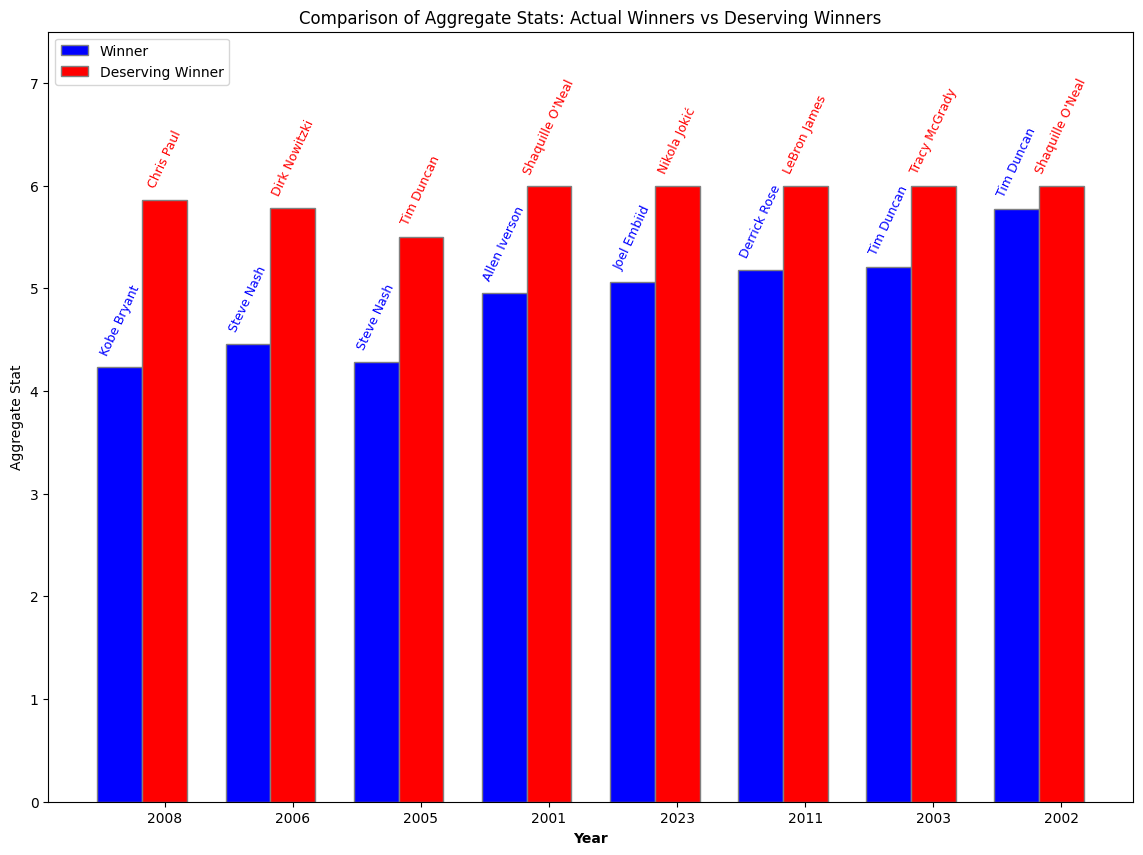

In [158]:
import numpy as np

# Set the figure size
plt.figure(figsize=(14, 10))

# Set the bar width
bar_width = 0.35

# Set the positions of the bars
r1 = np.arange(len(df_least_deserving_mvps))
r2 = [x + bar_width for x in r1]

# Create the bars for the actual winners
bars1 = plt.bar(r1, df_least_deserving_mvps['Aggregate Stat'], color='b', width=bar_width, edgecolor='grey', label='Winner')

# Create the bars for the deserving winners
bars2 = plt.bar(r2, df_least_deserving_mvps['Deserving Winner Aggregate Stat'], color='r', width=bar_width, edgecolor='grey', label='Deserving Winner')

# Add labels
plt.xlabel('Year', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(filtered_mvps))], filtered_mvps['Year'])
plt.ylabel('Aggregate Stat')
plt.title('Comparison of Aggregate Stats: Actual Winners vs Deserving Winners')

# Expand the y-axis limit
plt.ylim(0, 7.5)

# Create legend
plt.legend()

# Annotate bars with names at a 65-degree angle
for bar, name in zip(bars1, filtered_mvps['Winner']):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval + 0.1, name, ha='center', va='bottom', fontsize=9, color='blue', rotation=65)

for bar, name in zip(bars2, filtered_mvps['Deserving Winner']):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval + 0.1, name, ha='center', va='bottom', fontsize=9, color='red', rotation=65)

# Show the plot
plt.show()


## Conclusion

This are the main points deducted from this analysis:

- 8 out of the 24 (33%) selected MVPs were "undeserving" based on advanced stats
- 6 or the 8 were before 2010 when advanced stats were not as popular. The other 2 were in 2011 and 2023.
- The least deserving MVP was Kobe Bryant in 2008 with a Stat Differential of 1.63. The deserving winner that year was Chris Paul.
- The most affected player was Shaquille O'Neal, losing the MVP in 2 years, 2001 and 2002
- The player who benefited the most was Steve Nash, winning 2 MVPs in 2005 and 2006. Tim Duncan also won 2 but in much closer races.

Advanced stats are only part of the equation voters use to make their selection, but as a standalone metric these are the results.